In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/hmnist_28_28_RGB.csv', delimiter=',')
df2.dataframeName = 'hmnist_28_28_L.csv'

In [ ]:
df2.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
df2['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [ ]:
y=df2.loc[:,"label"].values
X=df2.iloc[:,:-1].values

In [ ]:
print(X.shape)

(10015, 2352)


In [ ]:
values=np.arange(0,7,1)

In [ ]:
def histogram(y):
  his=np.zeros(7)
  for i in range(len(y)):
    his[y[i]]+=1
  return his

In [ ]:
his=histogram(y)

In [ ]:
print(his)

[ 327.  514. 1099.  115. 6705.  142. 1113.]


<BarContainer object of 7 artists>

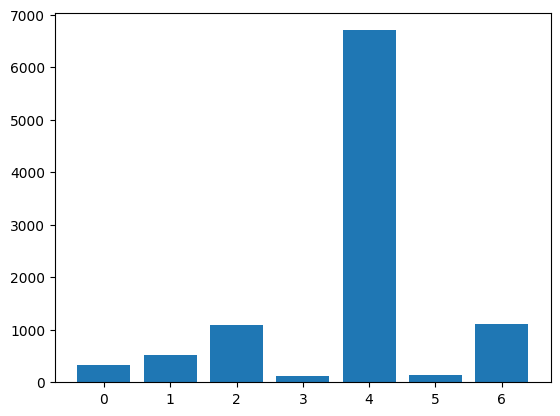

In [ ]:
plt.bar(values,his)

In [ ]:
label={
    ' Actinic keratoses':0,
    'Basal cell carcinoma':1,
    'Benign keratosis-like lesions':2,
    'Dermatofibroma':3,
    'Melanocytic nevi':4,
    'Melanoma':6,
    'Vascular lesions':5
}

In [ ]:
X1=X.reshape(-1,28,28,3)

In [ ]:

print('Shape of Data :', X1.shape)

Shape of Data : (10015, 28, 28, 3)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=1)

In [ ]:
print(X_train.shape)

(8012, 28, 28, 3)


In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
def accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [ ]:
def create_model():
  model=Sequential()
  model.add(Conv2D(64,(2,2),input_shape=(28,28,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())

  model.add(Conv2D(512,(2,2),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())

  model.add(Dropout(0.3))

  model.add(Conv2D(1024,(2,2),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())

  model.add(Dropout(0.3))

  model.add(Conv2D(1024,(1,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(1, 1)))
  model.add(BatchNormalization())
  #
  model.add(Dropout(0.3))
  model.add(Conv2D(1024,(1,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(1, 1)))
  model.add(BatchNormalization())

  #
  model.add(Dropout(0.3))

  model.add(Flatten())

  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.2))


  model.add(Dense(7,activation='softmax'))

  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[accuracy])
  return model





In [ ]:
print(y_train.shape)

(8012,)


In [ ]:
print(X_train.shape)

(8012, 28, 28, 3)


In [ ]:
import tensorflow as tf

In [ ]:
model1=create_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 512)       131584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 512)         0         
 g2D)                                                            
                                                        

In [ ]:

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=50 ,
                    validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


251/251 [==============================] - 18s 15ms/step - loss: 1.1520 - accuracy: 0.6631 - val_loss: 1.0411 - val_accuracy: 0.6071
Epoch 2/50
251/251 [==============================] - 3s 13ms/step - loss: 0.8273 - accuracy: 0.7017 - val_loss: 0.7865 - val_accuracy: 0.7194
Epoch 3/50
251/251 [==============================] - 3s 13ms/step - loss: 0.7895 - accuracy: 0.7156 - val_loss: 1.7497 - val_accuracy: 0.6765
Epoch 4/50
251/251 [==============================] - 3s 12ms/step - loss: 0.7344 - accuracy: 0.7330 - val_loss: 0.7525 - val_accuracy: 0.7479
Epoch 5/50
251/251 [==============================] - 4s 17ms/step - loss: 0.7077 - accuracy: 0.7379 - val_loss: 0.9755 - val_accuracy: 0.6355
Epoch 6/50
251/251 [==============================] - 5s 18ms/step - loss: 0.6972 - accuracy: 0.7433 - val_loss: 0.8024 - val_accuracy: 0.7079
Epoch 7/50
251/251 [==============================] - 5s 19ms/step - loss: 0.6771 - accuracy: 0.7498 - val_loss: 0.9312 - val_accuracy: 0.7089
Epoch 8/5

In [ ]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()



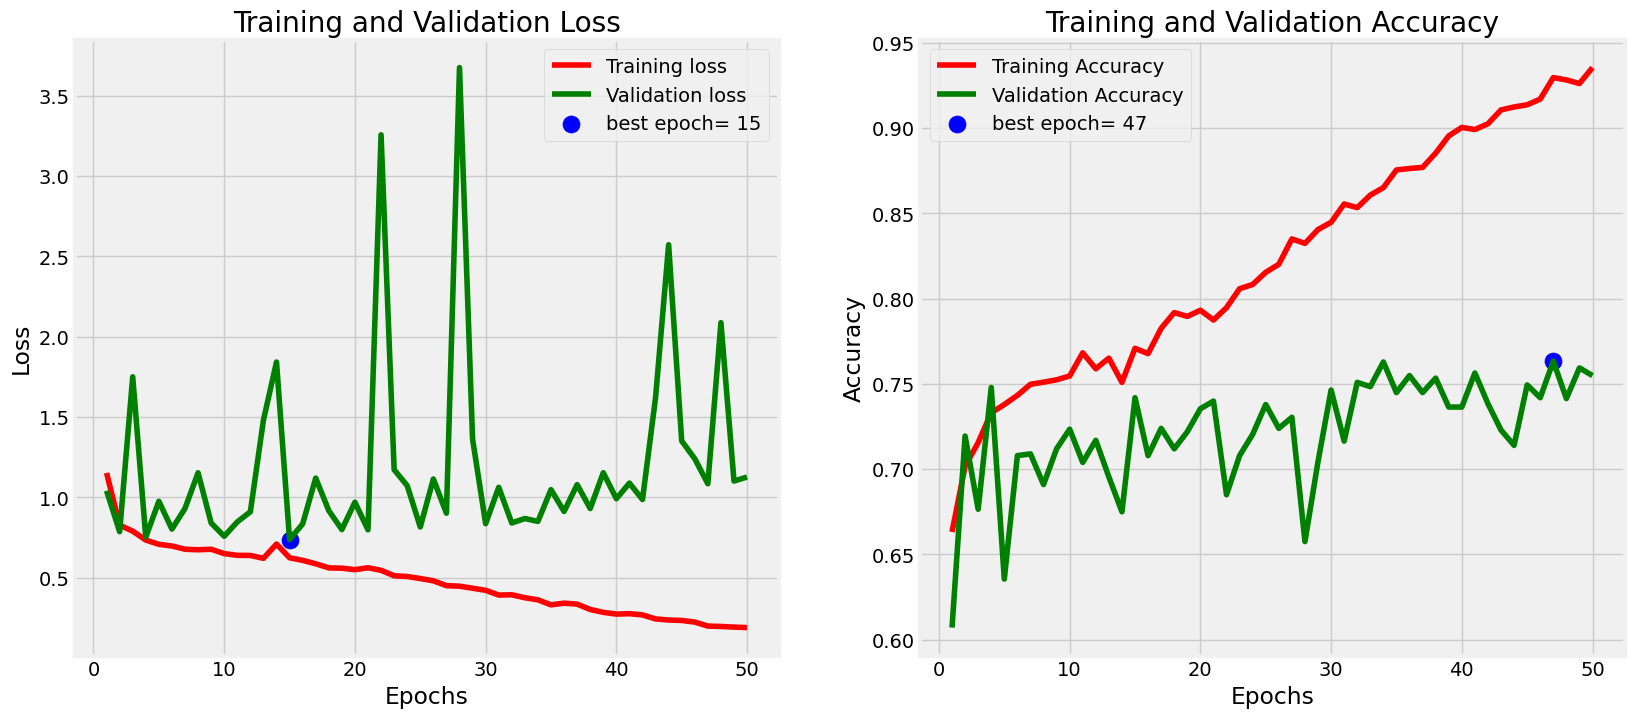

In [ ]:
plot_training(history1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
early=EarlyStopping(monitor='accuracy',patience=4,mode='auto')


In [ ]:
model2=create_model()

In [ ]:
class_weights = {0:1,1:1,2:1,3:1,4:0.5,5:1,6:1}

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history2=model2.fit(X_train,y_train,epochs=50,batch_size=128,class_weight=class_weights,validation_data=(X_test, y_test),callbacks=[early])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 [==============================] - 8s 56ms/step - loss: 0.9457 - accuracy: 0.6271 - val_loss: 2.5015 - val_accuracy: 0.6580
Epoch 2/50
63/63 [==============================] - 2s 35ms/step - loss: 0.6975 - accuracy: 0.6796 - val_loss: 1.1963 - val_accuracy: 0.5836
Epoch 3/50
63/63 [==============================] - 2s 33ms/step - loss: 0.6389 - accuracy: 0.7068 - val_loss: 1.0350 - val_accuracy: 0.6770
Epoch 4/50
63/63 [==============================] - 2s 33ms/step - loss: 0.5867 - accuracy: 0.7298 - val_loss: 1.0552 - val_accuracy: 0.5851
Epoch 5/50
63/63 [==============================] - 2s 33ms/step - loss: 0.5483 - accuracy: 0.7378 - val_loss: 0.9703 - val_accuracy: 0.6181
Epoch 6/50
63/63 [==============================] - 2s 33ms/step - loss: 0.5377 - accuracy: 0.7486 - val_loss: 1.3949 - val_accuracy: 0.4838
Epoch 7/50
63/63 [==============================] - 2s 34ms/step - loss: 0.5179 - accuracy: 0.7539 - val_loss: 0.8334 - val_accuracy: 0.6815
Epoch 8/50
63/63 [======

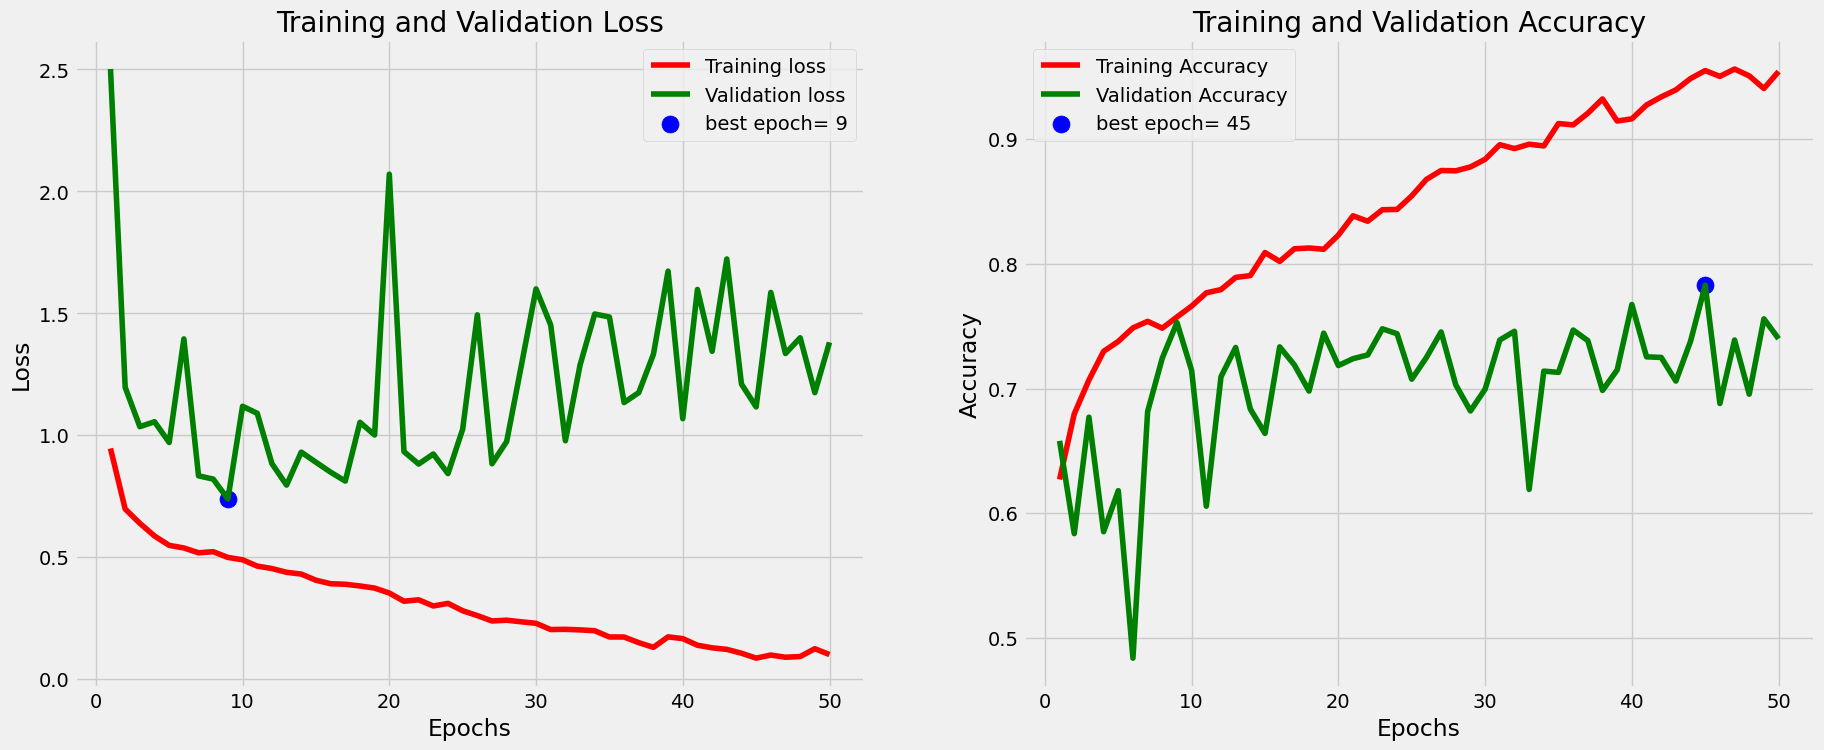

In [ ]:
plot_training(history2)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
X_2, y_2  = oversample.fit_resample(X, y)
X_2 = np.array(X_2).reshape(-1, 28, 28, 3)
print('Shape of Data :', X_2.shape)

Shape of Data : (46935, 28, 28, 3)


In [ ]:
his2=histogram(y_2)

<BarContainer object of 7 artists>

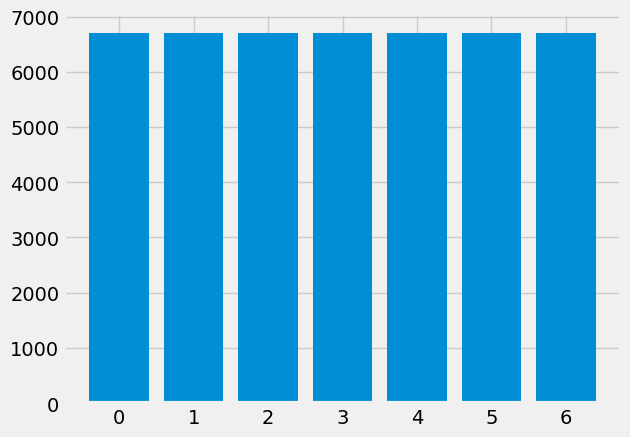

In [ ]:
plt.bar(values,his2)


In [ ]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X_2,y_2,test_size=0.2,random_state=1)

In [ ]:
model3=create_model()

In [ ]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history3 = model3.fit(X_train2, y_train2,batch_size=512, epochs=50 ,
                    validation_data=(X_test2, y_test2))

Epoch 1/50
74/74 [==============================] - 18s 152ms/step - loss: 1.2242 - accuracy: 0.5764 - val_loss: 2.1045 - val_accuracy: 0.2825
Epoch 2/50
74/74 [==============================] - 9s 125ms/step - loss: 0.6453 - accuracy: 0.7578 - val_loss: 2.3460 - val_accuracy: 0.4166
Epoch 3/50
74/74 [==============================] - 9s 126ms/step - loss: 0.4399 - accuracy: 0.8353 - val_loss: 1.1478 - val_accuracy: 0.6371
Epoch 4/50
74/74 [==============================] - 10s 131ms/step - loss: 0.3213 - accuracy: 0.8797 - val_loss: 0.6415 - val_accuracy: 0.7557
Epoch 5/50
74/74 [==============================] - 9s 124ms/step - loss: 0.2612 - accuracy: 0.9004 - val_loss: 0.7077 - val_accuracy: 0.7633
Epoch 6/50
74/74 [==============================] - 9s 122ms/step - loss: 0.2141 - accuracy: 0.9199 - val_loss: 0.6114 - val_accuracy: 0.7896
Epoch 7/50
74/74 [==============================] - 9s 121ms/step - loss: 0.1627 - accuracy: 0.9393 - val_loss: 0.1932 - val_accuracy: 0.9272
Epoc

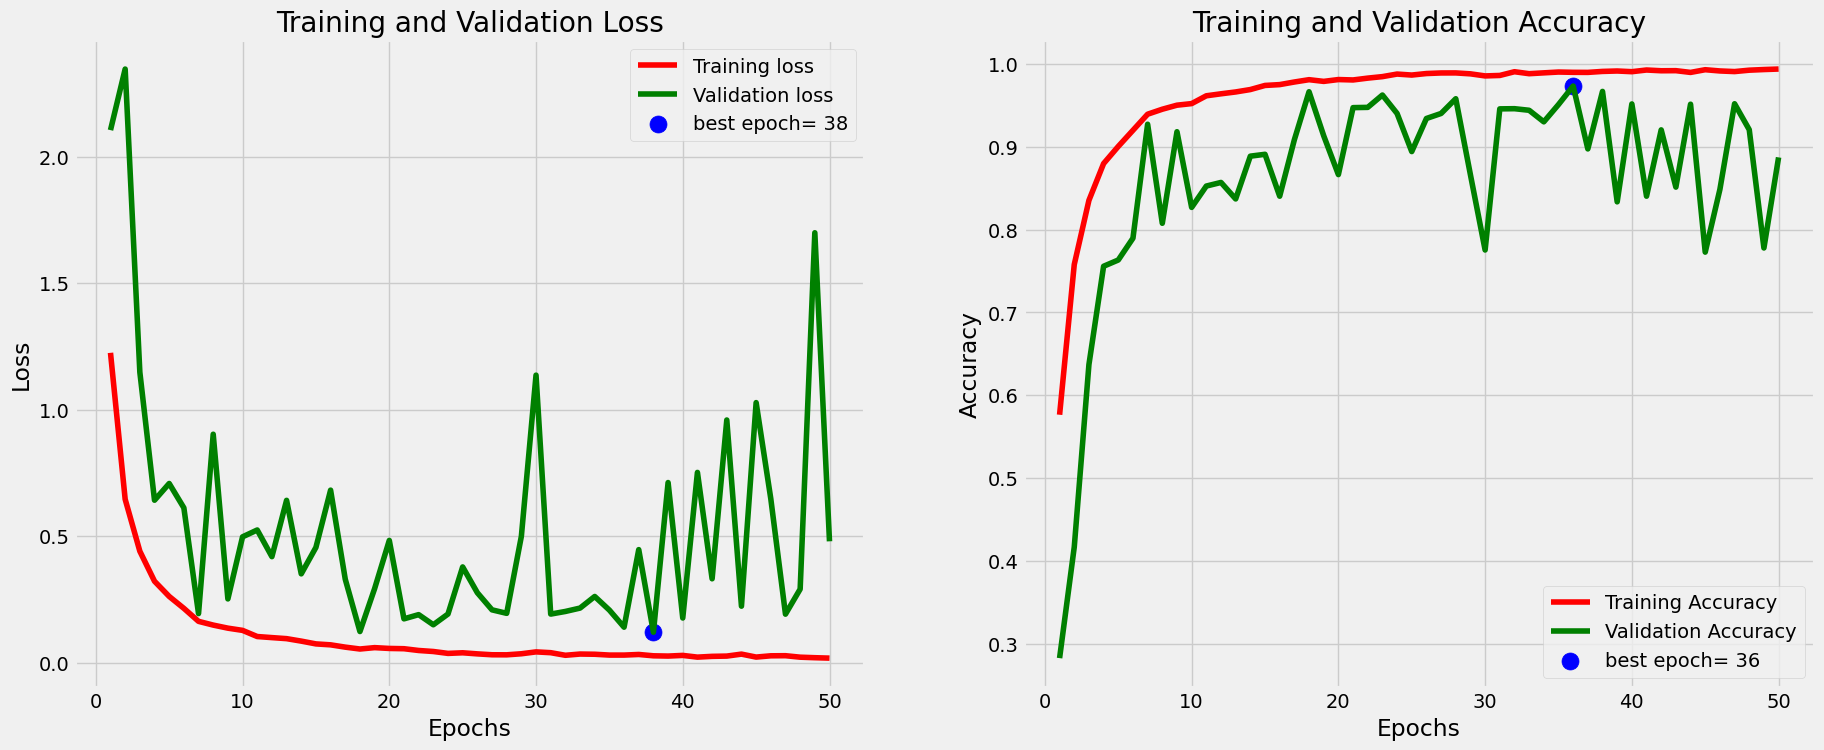

In [ ]:
plot_training(history3)